<a href="https://colab.research.google.com/github/ShikhaVishwakarma/Uber-and-Lyft-Cab-Data-Analysis-and-Fare-Prediction/blob/main/UberLyft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression,LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import os
import sys
%matplotlib inline

In [3]:
cab_data = pd.read_csv("/content/cab_rides.csv")
#cab_data=reduce_mem_usage(cab_data)
weather_data = pd.read_csv("/content/weather.csv")
#weather_data=reduce_mem_usage(weather_data)

In [4]:
cab_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1.543710e+12,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1.543710e+12,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1.543710e+12,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1.543710e+12,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [5]:
weather_data

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


In [6]:
import datetime
cab_data['datetime']= pd.to_datetime(cab_data['time_stamp'])
cab_data
weather_data['date_time'] = pd.to_datetime(weather_data['time_stamp'])

In [7]:
cab_data.columns, weather_data.columns


(Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
        'surge_multiplier', 'id', 'product_id', 'name', 'datetime'],
       dtype='object'),
 Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
        'humidity', 'wind', 'date_time'],
       dtype='object'))

In [8]:
cab_data.shape, weather_data.shape

((693071, 11), (6276, 9))

In [9]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.892342e+08,9.324359,0.091641
min,0.020000,1.543200e+12,2.500000,1.000000
25%,1.280000,1.543440e+12,9.000000,1.000000
50%,2.160000,1.543740e+12,13.500000,1.000000
75%,2.920000,1.544830e+12,22.500000,1.000000
max,7.860000,1.545160e+12,97.500000,3.000000


In [10]:
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [11]:
data=pd.concat([cab_data,weather_data])

In [13]:
data['day']=data.date_time.dt.day
data['hour']=data.date_time.dt.hour

In [14]:
data.isnull().sum

<bound method DataFrame.sum of       distance  cab_type  time_stamp  ...  date_time    day   hour
0        False     False       False  ...       True   True   True
1        False     False       False  ...       True   True   True
2        False     False       False  ...       True   True   True
3        False     False       False  ...       True   True   True
4        False     False       False  ...       True   True   True
...        ...       ...         ...  ...        ...    ...    ...
6271      True      True       False  ...      False  False  False
6272      True      True       False  ...      False  False  False
6273      True      True       False  ...      False  False  False
6274      True      True       False  ...      False  False  False
6275      True      True       False  ...      False  False  False

[699347 rows x 21 columns]>

In [15]:
data.fillna(0,inplace=True)


In [16]:
data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'date_time', 'day', 'hour'],
      dtype='object')

In [17]:
data.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
cab_type,,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


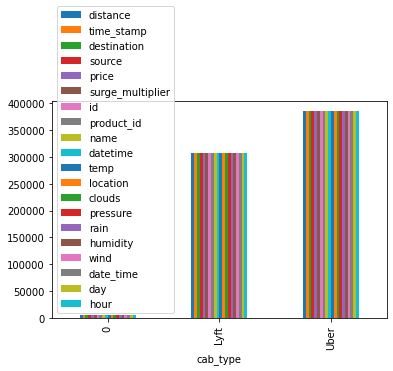

In [18]:
data.groupby('cab_type').count().plot.bar()

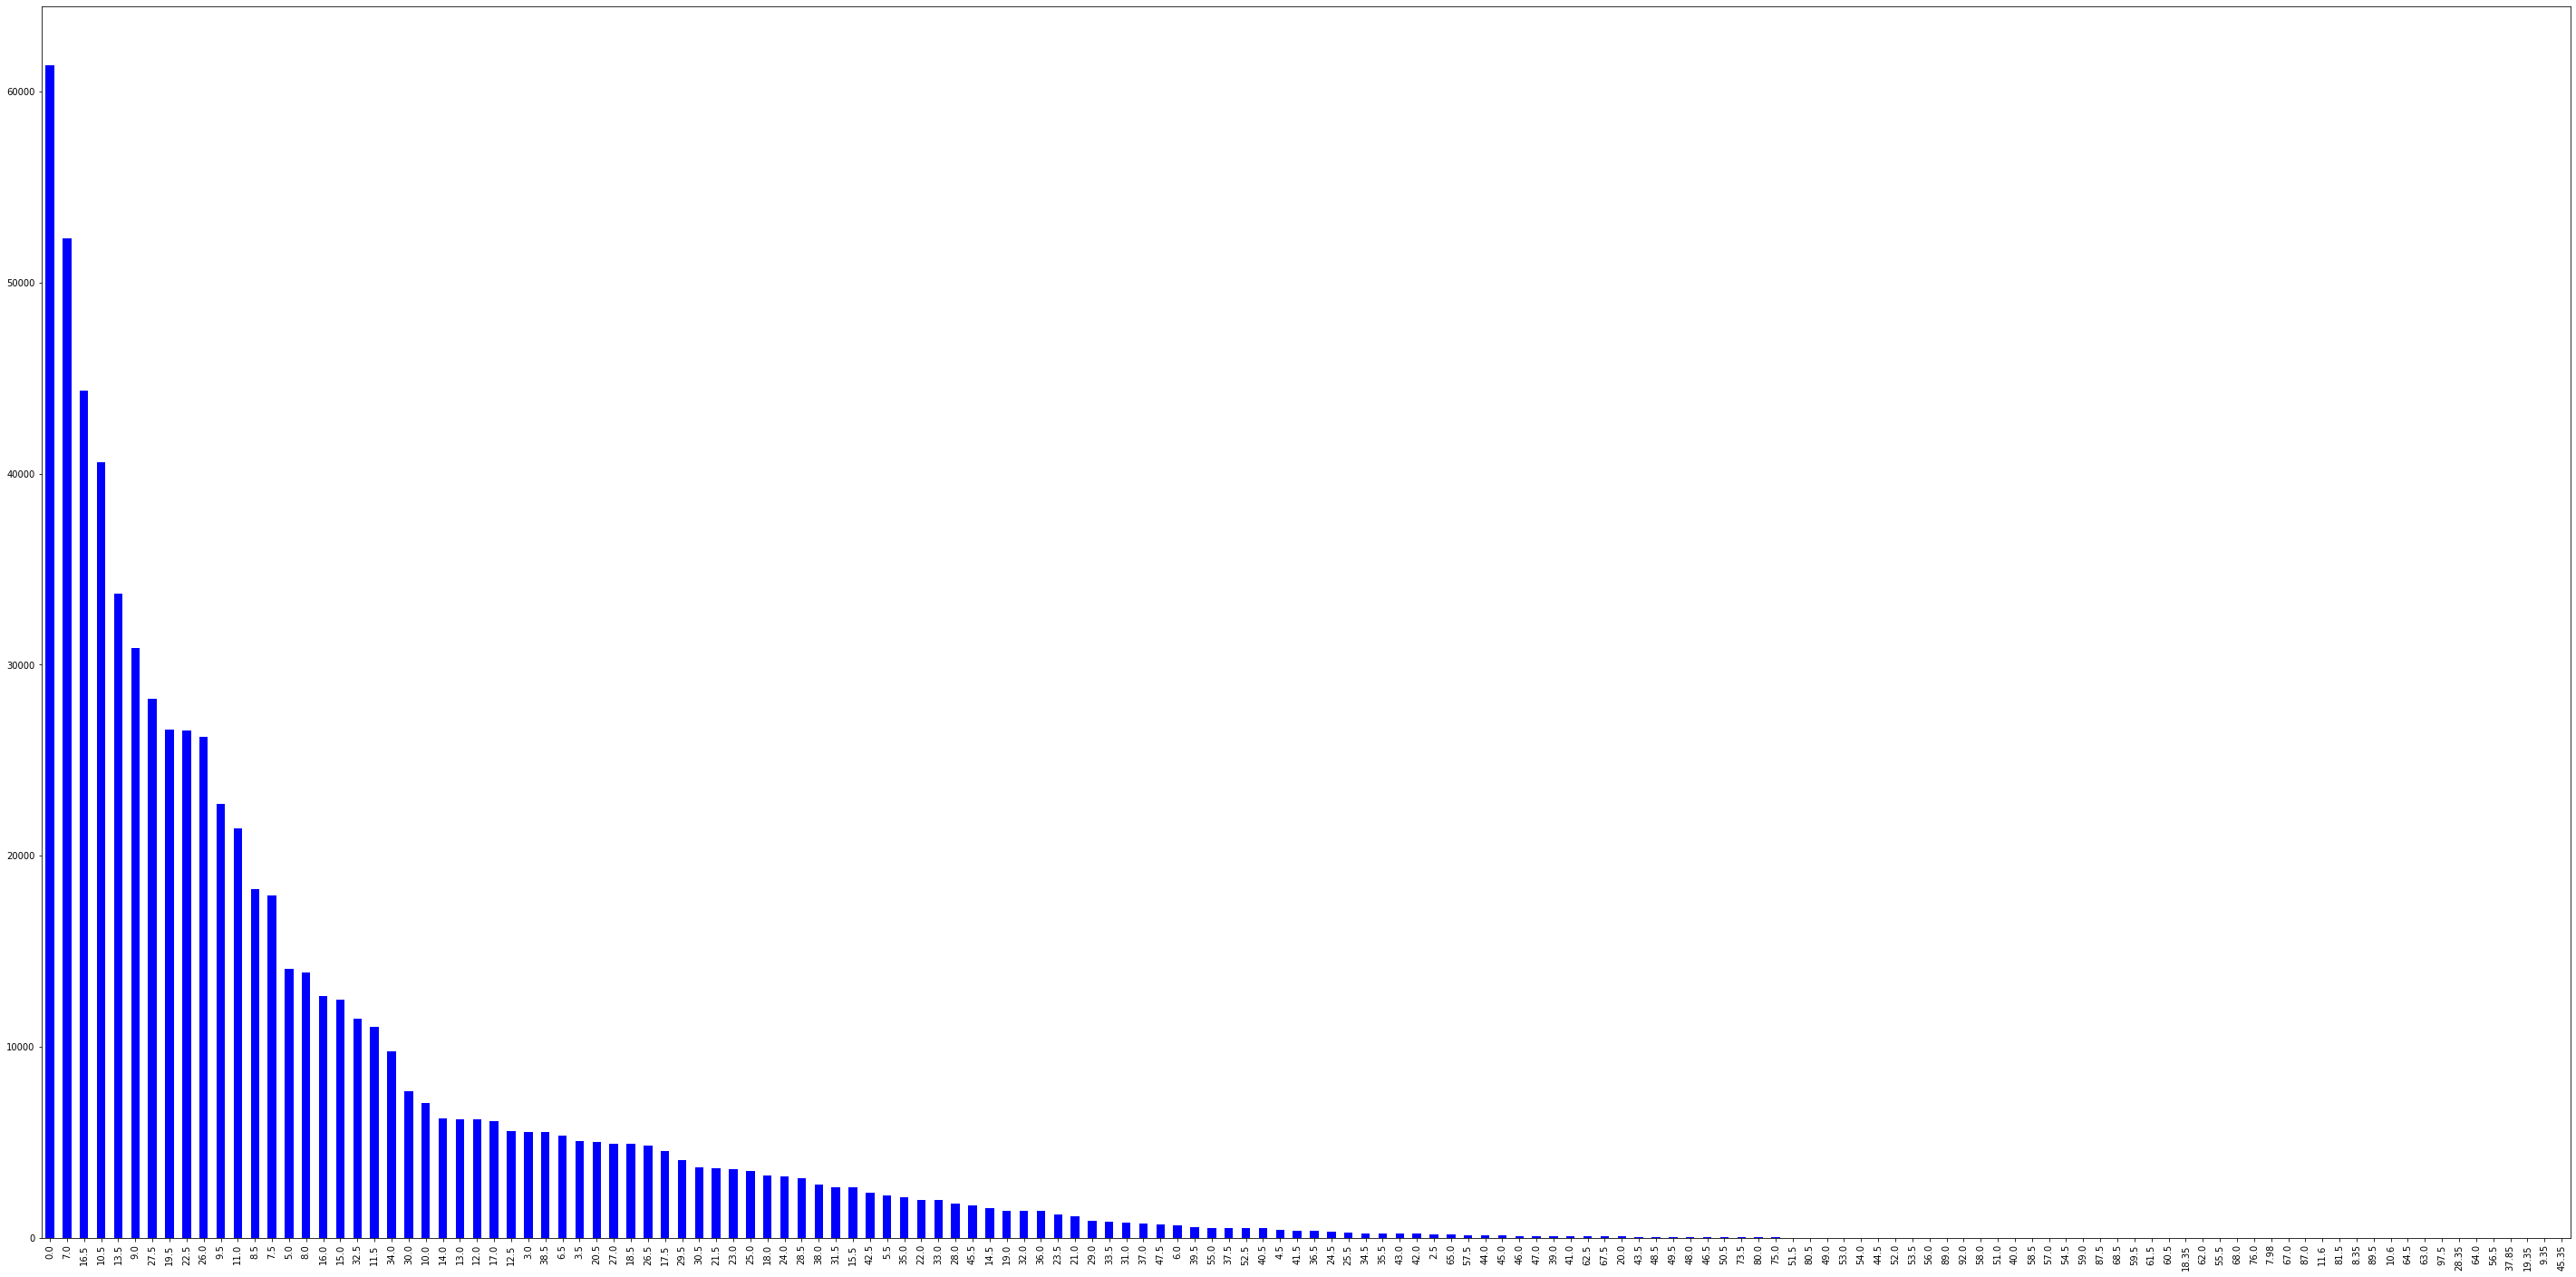

In [19]:
data['price'].value_counts().plot(kind='bar',figsize=(50,25),color='blue')

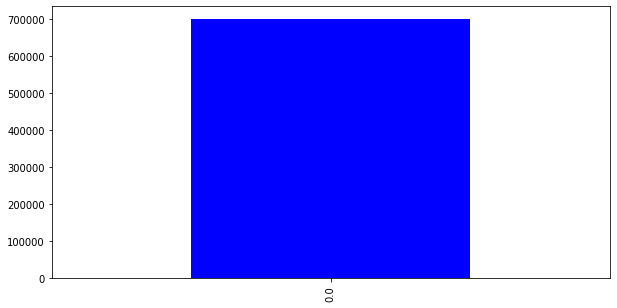

In [20]:
data['hour'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

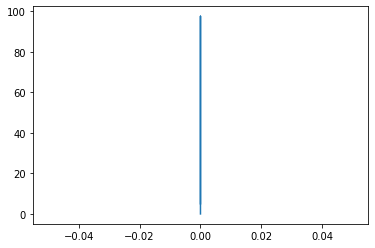

In [21]:
import matplotlib.pyplot as plt
x=data['hour']
y=data['price']
plt.plot(x,y)
plt.show()

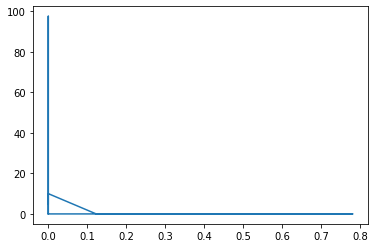

In [22]:
x=data['rain']
y=data['price']
plt.plot(x,y)
plt.show()

In [23]:
data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'date_time', 'day', 'hour'],
      dtype='object')

In [24]:
x1=data[['distance', 'temp','clouds', 'pressure', 'humidity','wind','rain','day','hour','surge_multiplier','clouds']]
y1=data['price']

In [25]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, y_train, x_test, y_test = train_test_split(x1, y1, test_size = 0.25, random_state = 42)

In [44]:
len(y_test)

174837

In [26]:
linear=LinearRegression()
linear.fit(x_train,x_test)

LinearRegression()

In [45]:
predictions=linear.predict(y_train)
predictions
type(predictions)
len(predictions)

174837

In [53]:
y_test=np.array(y_test)
print(y_test)
#type(np.array(y_test))


[42.5  0.  32.5 ...  9.   8.  27.5]


In [71]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)

In [57]:
y_test

array([42.5,  0. , 32.5, ...,  9. ,  8. , 27.5])

In [58]:
predictions

array([32.54791635, 14.75560763, 16.81696874, ..., 11.82898384,
       11.85443274, 13.22867348])

In [59]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df

,Actual,Predicted
0,42.5,32.547916
1,0.0,14.755608
2,32.5,16.816969
3,27.5,10.480192
4,27.5,10.556539
...,...,...
174832,7.5,10.709232
174833,13.5,15.519075
174834,9.0,11.828984
174835,8.0,11.854433


In [72]:
x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

predictions=predictions.reshape(-1,1)

In [73]:
r2_score = linear.score(x_test,y_test)
print(r2_score*100,'%')


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

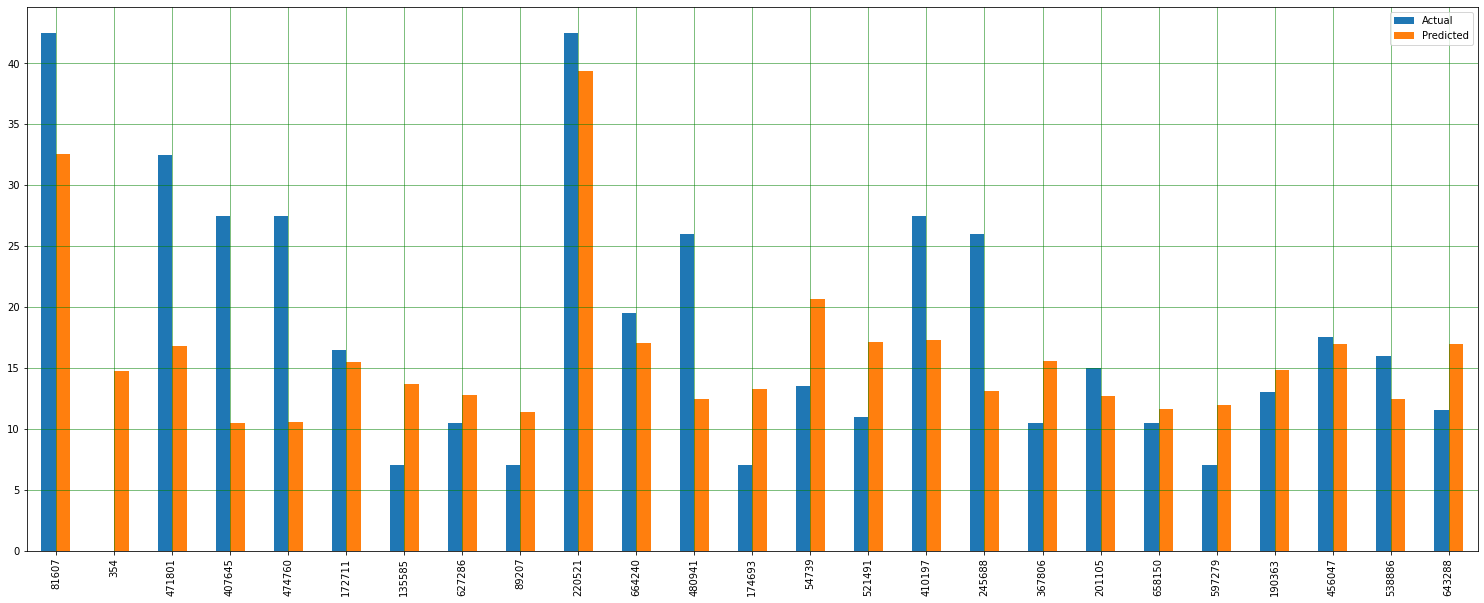

In [29]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(26,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
#task: find the error!